More Advanced Python
====================

A refresher
-----------

Python is a programming language similar, in may respects, to R. Differences:

1. Whitespace sensitive syntax - roughly speaking, blocks denoted with {} in R are instead indicated via indentation
2. No environment tom-foolery. Python's environments work very similarly to R's but cannot be accessed directly
3. Pervasive, single-dispatch, class based object orientation: `some_object.a_method(a1,a2)` is a method invocation rougly equivalent to the R code: `a_method(some_object, a1, a2)`. Classes are defined `class`.
4. More in your face modularization: each file is a module and implicitly its own environment.
5. external package management either via pip or systems like anaconda
6. Not designed as a data science or scientific programming language. Thus, numeric and string types are not "vectorized." We need an external package for that.

Some examples:

In [1]:
## function definition
## Note the explicit return statement.

def plus(a,b):
    return a + b;

## if statements:

if 10 > 11:
    print("Never True")
else:
    print("Always True")
    
## loops

for i in range(10):
    print(i*10)
    
i = 0
while i < 10:
    print(i*i)
    i = i + 1;

## list comprehensions

print([i*i*i for i in range(10)])

## anonymous functions/lambda

lambda x : x-3

## class definition - no simple equivalent in R

class World:
    ## a class property
    name = '';
    ## An init method, called when the class creates an instance
    def __init__(self, name):
        self.name = name;
        
    ## a method which returns an instance's name
    def get_name(self):
        return self.name;
        
## Creating an instance of the object

w = World("earth")

print(w.get_name());

Always True
0
10
20
30
40
50
60
70
80
90
0
1
4
9
16
25
36
49
64
81
[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]
earth


The Tools of the Data Scientist
===============================

Python is a much broader ecosystem than R and this is both good and bad. Often we are spoiled for choice with Python where in R there is more or less "one way to do it." This is ironic, since Python originally presented itself as an alternative to the older, weirder, language "Perl" whose motto was "There is more than one way to do it." Perl is pretty much dead at this point.

Anyway, the tools:

1. numpy array language support
2. pandas - data frame support
3. plotting - [multifarious](https://opensource.com/article/20/4/plot-data-python). matplotlib, plotnine (like ggplot), plotly, bokeh, altair, pygal.
4. sklearn - a large library of standardized statistical and machine learning methods
5. neural networks - tensorflow, pytorch, theano, keras, etc 

Much of what you've learned in R is applicable here, however. I still recommend distinct Python scripts for different steps in your analysis. Orchestrated via Makefiles and disk-persisted intermediate objects like CSV files or JSON objects.

It is possible to call R from Python and vice-verse but I don't recommend this approach.

Numpy
=====

Q: Why Numpy?
-------------

Answer: Python is a high level, interpreted, dynamically typed, programming language. This means that before almost any action (like adding two numbers) Python must check that the arguments to `+` are the correct type among many other operations. Because Python is high level and object oriented, `+` might invoke methods any of which might depend on the type of either argument. This applies to almost any "step" in a python program. Python is thus many thousands of times slower than what we call "machine code" - just straight up numerical instructions to a processor. Python it itself written in a low level, statically typed, compiled programming language called C. C was created to translate human readable code more or less directly to machine code. C forces you to express many of the invariants of your code up front so that the compiler can generate machine code with very few checks. Thus, its much faster.

Numpy is a library where all the operations on uniformly typed arrays are implemented in C code. Thus they can be much, much faster and memory efficient than Python code.

(PS - Learning C is a good idea!)

Dockerfile:
-----------
```
  RUN pip3 install numpy
```

In [2]:
import numpy as np

## Numpy lets you create multidimensional arrays of various sorts.
## These are represented efficiently in memory 
## Numpy additionally provides functions and methods to operate efficiently on them

x = np.random.ranf(10000)
x

array([0.99996114, 0.98770175, 0.70131783, ..., 0.05271227, 0.82627679,
       0.3301072 ])

In [3]:
## We can now perform some operations on this vector
## These are quite efficient because they run in compiled code
(x.mean(), x.std())

(0.5014526492407511, 0.29005835728227547)

In [4]:
## If we introduce another variable of the same size:
y = np.random.ranf(10000);
## We can peform various binary operations on them:
x+y

array([1.76197522, 1.50561061, 1.32931045, ..., 0.32723648, 1.6117066 ,
       1.06395601])

In [5]:
# This works if they are compatible sizes:
z = np.random.ranf(100)
#x+z

In [6]:
## But you can always add or multiple or whatever a scalar value:
x + 10

array([10.99996114, 10.98770175, 10.70131783, ..., 10.05271227,
       10.82627679, 10.3301072 ])

In [7]:
## Some stuff you might imagine are methods are also provided as functions:
np.sin(x)

array([0.84144999, 0.83476274, 0.64522506, ..., 0.05268787, 0.73541356,
       0.32414444])

In [8]:
## These functions generally return another numpy array where appropriate, so you can chain them:
np.sin(x).std() + y

array([1.01085947, 0.76675425, 0.87683801, ..., 0.5233696 , 1.0342752 ,
       0.9826942 ])

Shape and Size
==============

Numpy arrays can be of any shape and size.

In [9]:
x = np.zeros((3,5)) ## we use a tuple to pass dimensions into numpy constructing functions
x

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
y = np.random.ranf((15,3))
y

array([[0.39466721, 0.70414522, 0.77162203],
       [0.70853751, 0.81911401, 0.79124725],
       [0.28811885, 0.15191927, 0.56738642],
       [0.98955519, 0.39843678, 0.93452469],
       [0.81685299, 0.40215796, 0.09916779],
       [0.30070124, 0.07716004, 0.70008458],
       [0.59292976, 0.13989746, 0.44131303],
       [0.04952281, 0.59126297, 0.79443309],
       [0.02774664, 0.94032281, 0.12573483],
       [0.09984254, 0.34168247, 0.23728087],
       [0.70768315, 0.00452954, 0.75226559],
       [0.16100143, 0.14318733, 0.41167877],
       [0.39821153, 0.00523924, 0.91325498],
       [0.40472699, 0.25670331, 0.7488121 ],
       [0.11714528, 0.25824336, 0.55673182]])

In [11]:
## In a certain sense, all arrays with the same size are equivalent. 
## We can "reshape" arrays to any other shape that shares the same number 
## of elements without losing information.

y.reshape((3,5,3))

array([[[0.39466721, 0.70414522, 0.77162203],
        [0.70853751, 0.81911401, 0.79124725],
        [0.28811885, 0.15191927, 0.56738642],
        [0.98955519, 0.39843678, 0.93452469],
        [0.81685299, 0.40215796, 0.09916779]],

       [[0.30070124, 0.07716004, 0.70008458],
        [0.59292976, 0.13989746, 0.44131303],
        [0.04952281, 0.59126297, 0.79443309],
        [0.02774664, 0.94032281, 0.12573483],
        [0.09984254, 0.34168247, 0.23728087]],

       [[0.70768315, 0.00452954, 0.75226559],
        [0.16100143, 0.14318733, 0.41167877],
        [0.39821153, 0.00523924, 0.91325498],
        [0.40472699, 0.25670331, 0.7488121 ],
        [0.11714528, 0.25824336, 0.55673182]]])

In [12]:
## Has y been changed?
y

array([[0.39466721, 0.70414522, 0.77162203],
       [0.70853751, 0.81911401, 0.79124725],
       [0.28811885, 0.15191927, 0.56738642],
       [0.98955519, 0.39843678, 0.93452469],
       [0.81685299, 0.40215796, 0.09916779],
       [0.30070124, 0.07716004, 0.70008458],
       [0.59292976, 0.13989746, 0.44131303],
       [0.04952281, 0.59126297, 0.79443309],
       [0.02774664, 0.94032281, 0.12573483],
       [0.09984254, 0.34168247, 0.23728087],
       [0.70768315, 0.00452954, 0.75226559],
       [0.16100143, 0.14318733, 0.41167877],
       [0.39821153, 0.00523924, 0.91325498],
       [0.40472699, 0.25670331, 0.7488121 ],
       [0.11714528, 0.25824336, 0.55673182]])

In [13]:
## We can inspect shapes by looking at the shape property
y.shape

(15, 3)

In [14]:
## Note that there are different ways of representing the same 1d arrays:
r = np.random.ranf;
(r(10).shape, r((1,10)).shape, r((10,1)).shape)

((10,), (1, 10), (10, 1))

In [15]:
## You can always return to the "flat" version of an array with the following idiom:
x = np.random.ranf((7,6,5));
y = x.reshape(np.product(x.shape))
y

array([9.56365501e-01, 5.98351994e-01, 5.73752703e-03, 6.03274120e-01,
       6.26300427e-01, 3.62111119e-01, 7.46079458e-01, 8.63839356e-01,
       4.25342685e-01, 5.22000731e-01, 7.34225143e-01, 9.82832835e-01,
       1.44361127e-01, 7.31142849e-01, 4.07838196e-01, 5.66686102e-01,
       3.85923755e-01, 9.45541273e-01, 3.99490232e-01, 7.63720034e-01,
       7.80368536e-01, 2.67298219e-01, 4.75103643e-01, 4.48475369e-01,
       5.28620468e-01, 2.49423860e-02, 7.79080422e-01, 9.73758141e-01,
       2.90515589e-01, 1.98117576e-01, 7.30518021e-01, 9.90497321e-02,
       5.14205606e-01, 5.39022099e-01, 8.37360145e-01, 6.56624927e-01,
       1.11480538e-01, 2.95028206e-01, 8.88438585e-02, 8.86789695e-01,
       3.71806079e-04, 6.83279484e-01, 2.46207350e-01, 6.79080440e-01,
       1.78468354e-01, 7.15484695e-01, 6.17237563e-01, 6.37577526e-01,
       4.17502936e-01, 6.12656149e-01, 1.08541101e-02, 3.16269430e-01,
       7.47321327e-01, 1.17000020e-01, 4.60685683e-01, 7.16464010e-01,
      

Efficiency and Vectorization
============================

Note that numpy supported operations are much faster than the equivalent hand-written Python. It is worth considering whether a little ingenuity can translate an apparently slow operation into some numpy operations. This is called "vectorization." Back when computers used to be slow this was a necessary skill. These days its still useful. You will see it.


An outer product is a classical example. Suppose we have two vectors x and y. We want every combination of sin(x) and cos(y) added together for some reason. The naive approach:

In [16]:
import numpy as np
import timeit

def naive():
    x = np.random.ranf(100);
    y = np.random.ranf(300); 
    z = np.zeros((100,300));|
    for xi  in range(x.shape[0]):
        for yi in range(y.shape[0]):
            z[xi,yi] = np.sin(x[xi]) + np.cos(y[yi])
    return z
            
def vectorized():
    x = np.random.ranf(100);
    y = np.random.ranf(300);
    return (np.sin(x.repeat(300).reshape((100,300))) + 
             np.cos(y.repeat(100).reshape((300,100)).transpose()))

times = (timeit.timeit("naive()",globals=globals(), number=100), timeit.timeit("vectorized", globals=globals(), number=100))
(times, times[0]/times[1])

((4.165017668000473, 2.651000613695942e-06), 1571111.544253374)

A lot faster!

Why Bother?
-----------

Anectdotal observations of my own behavior suggest that processes which take more than a second or so to complete give you enough time to get distracted. Its worth squeezing performance out of some analysis if it keeps you in a state of flow.

Note that we can do these sorts of tricks in R as well as Python.

Anyway
------

Numpy is a big library with a lot of methods meant to help you write performant code. Read the docs. Experiment! 



We can do all the usual dataframe stuff here. Select a subset of columns, for instance:



Plotting
========

The most common Python plotting libraries are not all that much like ggplot. We'll start with matplotlib.

Text(0.5, 0, 'Some random numbers')

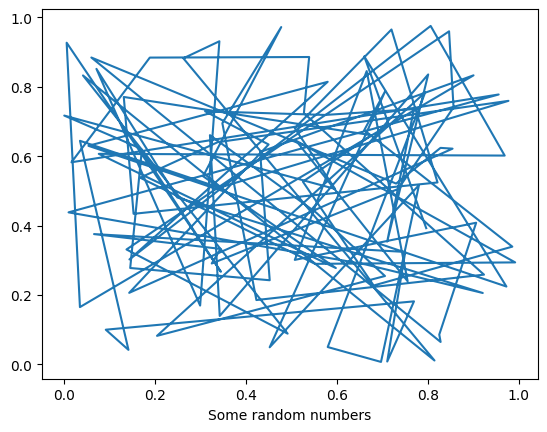

In [21]:
import matplotlib.pyplot as plt
import numpy as np

## the pyplot api is much more procedural than ggplot. 

plt.plot(np.random.ranf(100),np.random.ranf(100))
plt.xlabel("Some random numbers")

This is probably better as a scatter plot:

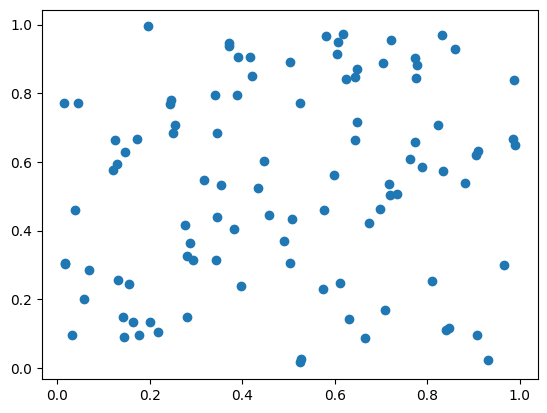

In [22]:
plt.scatter(np.random.ranf(100),np.random.ranf(100))

If we want to color code our points we have to do it like this:

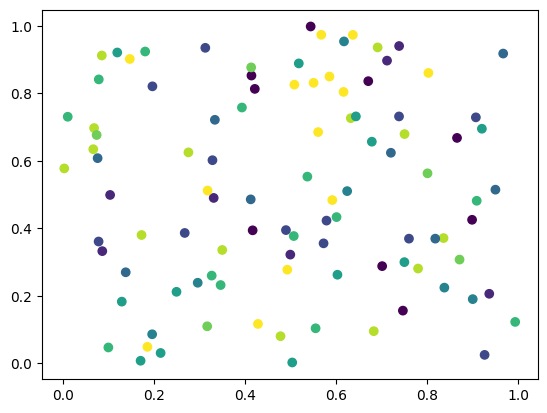

In [23]:
plt.scatter(np.random.ranf(100),np.random.ranf(100),c=np.random.randint(0,10,100))

The net effect of this is that you really can't learn any high level concepts with Matplotlib. You just need to memorize the [API](https://matplotlib.org/3.1.1/index.html). There is a different plot function for each supported type. Eg:

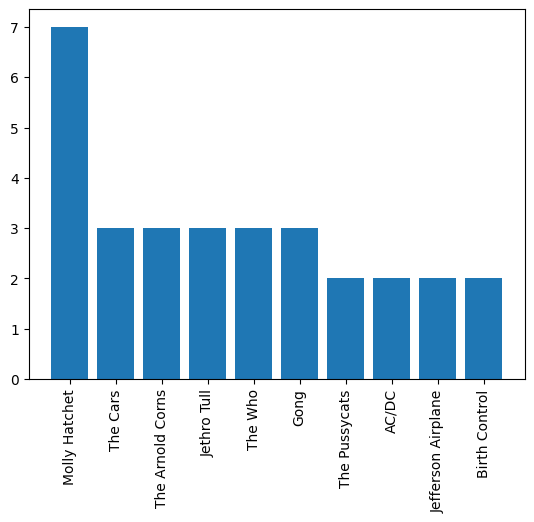

In [24]:

subset = a.sort_values('n_dead',ascending=False).head(10);
plt.bar(subset.index, subset['n_dead'])
plt.xticks(rotation=90);

Note that to modify the plot we relied upon a side effect onto the current plot. This is less elegant than the way the tidyverse works - we modify a ggplot by adding onto it with some values created by utility functions. This relies on some mysterious global state.

There are other plotting solutions. Let's look at plotnine:

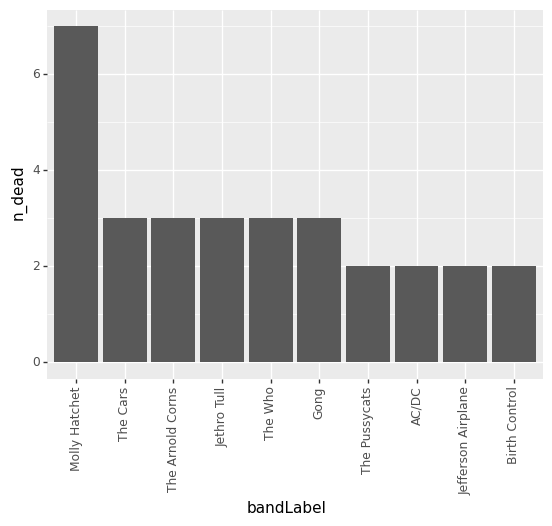

<ggplot: (8753690620179)>

In [25]:
from plotnine import *

# Convert the index column back to a full column
subset['bandLabel'] = subset.index;

# make it categorical - this is exactly what we did with factor variables 
# in R ggplot.
subset['bandLabel'] = pd.Categorical(subset['bandLabel'],categories=subset['bandLabel'])

## plotnine is an implementation of ggplot although we have to work with it slightly differently because of the way python is

(ggplot(subset, aes("bandLabel","n_dead")) + 
 geom_bar(stat="identity") + 
 theme(axis_text_x=element_text(rotation=90)))

You may find that your brain will prefer to just fight with plotnine's minor differences than try to express yourself in an entirely different plotting idiom.

Polyglot Workflows
------------------

Don't forget - because we separate each task into a small script and because we control the execution environment for our entire system via Docker and because we can chain together arbitrary tasks via Make, you can easily process your data with Python and make figures with R or vice versa. Thinking in small steps makes you more flexible.

Bokeh
-----

In [26]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
output_file("log_lines.html")

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend_label="y=x")
p.circle(x, x, legend_label="y=x", fill_color="white", size=8)
p.line(x, y0, legend_label="y=x^2", line_width=3)
p.line(x, y1, legend_label="y=10^x", line_color="red")
p.circle(x, y1, legend_label="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend_label="y=10^x^2", line_color="orange", line_dash="4 4")

## This should appear here but no luck
show(p)


)07=                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Plotting Summary
----------------

1. matplotlib is the most common but also the most primitive plotting system. It depends on a global state which you modify using function calls.
2. plotnine is less than standard but presents an almost identical face as ggplot - differences of subtle and not-so-subtle type abound and so it might be frustrating to use.
3. bokeh has a very good reputation and produces interactive plots.

sklearn
=======

SKLearn is a big library of statistical and machine learning methods. It is well organized but a little less easy to use than R in some ways. You'll encounter the same sort of problems that you encountered there: variable encoding for categorical variables, dealing with date times, dealing with missing and/or bad data.

scikit-learn hello world
-------------------

(Borrowed from: https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1)

In [27]:
# Import Dataset from sklearn
import pandas as pd
from sklearn.datasets import load_iris# Load Iris Data
iris = load_iris()# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

mapping = ["setosa","versicolor","virginica"];
def converter(specie):
    return mapping[specie];
    
target_df['species'] = target_df['species'].apply(converter)# Concatenate the DataFrames

iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Using sklearn goes like this.

1. What do I want to do
2. google "sk learn" "thing"
3. read the documentation a little bit
4. call "fit" and then "predict"
5. model characterization, selection, etc

Just about everything sklearn does is object oriented and based around the "fit" and "predict". 

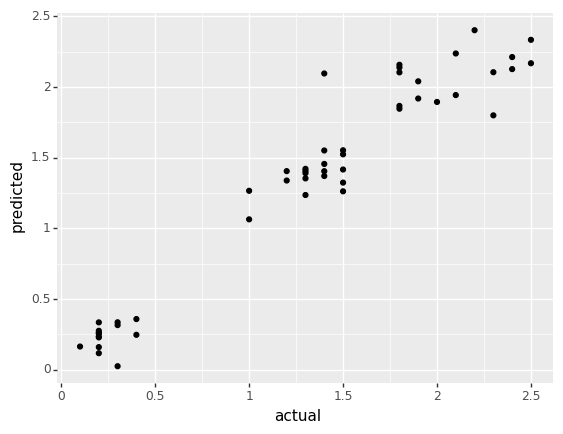

<ggplot: (8753752917667)>

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from plotnine import *


iris_dfns = iris_df.drop("species",axis=1)
X = iris_dfns.drop("petal width (cm)",axis=1)
y = iris_dfns["petal width (cm)"];

## Note the use of multiple return values.
## One of Python's many "dumb programming language tricks"
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33);

## Create the Regression Object:

lm = LinearRegression();

## and fit it

lm.fit(X_train, y_train)

results = pd.DataFrame({"actual":y_test, "predicted":lm.predict(X_test)});

(ggplot(results, aes("actual","predicted")) + geom_point())



Example 2: [Clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering)
-------------------------------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 38'. Pick better value with 'binwidth'.


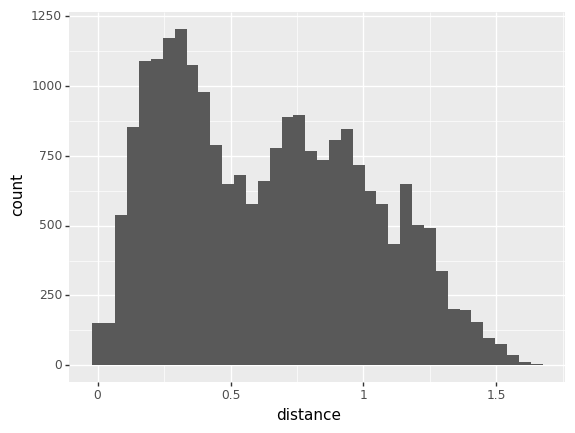

<ggplot: (8753737255388)>

In [29]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import numpy as np

mms = MinMaxScaler();

normed = mms.fit_transform(iris_dfns)
distances = pairwise_distances(normed)


(ggplot(pd.DataFrame({"distance":distances.reshape(np.product(distances.shape))}),
       aes("distance")) + geom_histogram())

Let's just say that anything less than 0.5 is adjacent.

In [30]:
adj = distances < 0.5
adj

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [31]:
sc = SpectralClustering(3,affinity="precomputed")
iris_df['cluster'] = sc.fit_predict(adj);
iris_df['cluster_dodged'] = iris_df['cluster'] + np.random.randn(nrow(iris_df))*0.1
def make_dodged_species(species):
    return mapping.index(species) + np.random.randn()*0.1;
    
iris_df['species_dodged'] = iris_df['species'].apply(make_dodged_species);

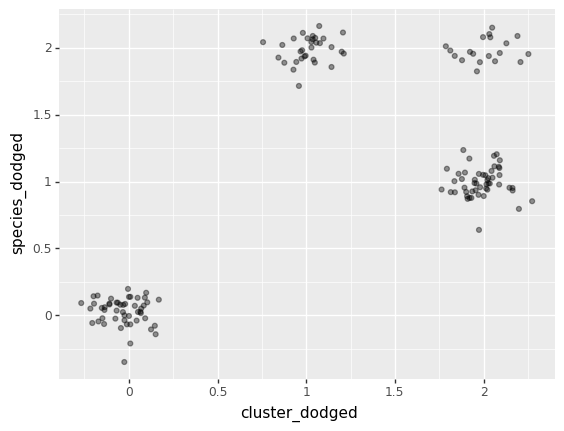

<ggplot: (8753737181895)>

In [32]:
(ggplot(iris_df,aes("cluster_dodged","species_dodged")) + geom_point(alpha=0.4))

In [33]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

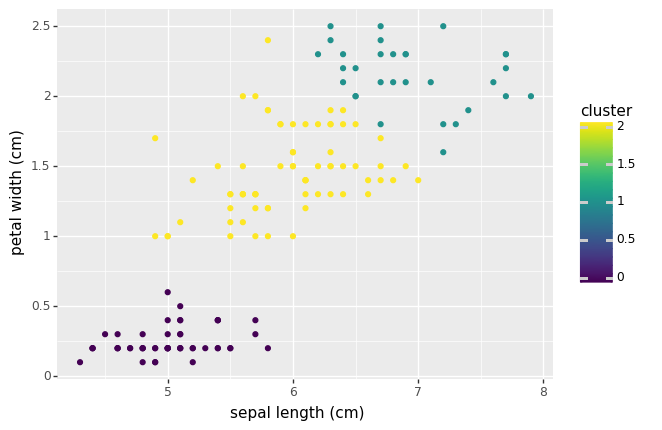

<ggplot: (8753752895067)>

In [34]:
(ggplot(iris_df,aes("sepal length (cm)","petal width (cm)")) + geom_point(aes(color="cluster")))

Ok, let's go a bit further and do some dimensionality reduction to go along with this clustering.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


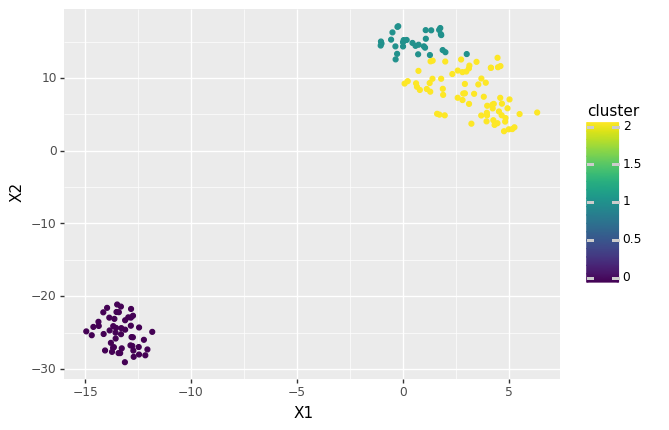

<ggplot: (8753752840689)>

In [35]:
from sklearn.manifold import TSNE

projection = TSNE(n_components=2).fit_transform(normed);
lowd = pd.DataFrame(projection, columns=["X1","X2"])
lowd["cluster"] = iris_df["cluster"];
(ggplot(lowd,aes("X1","X2")) + geom_point(aes(color="cluster")))